# Metric Explorations

In [1]:
from keras.models import Sequential,Model
from keras.layers import Dense,InputLayer
from keras.metrics import Precision,Recall,MeanIoU

Using TensorFlow backend.


In [14]:
model = Sequential()

model.add(InputLayer(input_shape=(1,)))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="sgd", loss='binary_crossentropy', metrics=['accuracy',Precision(),Recall(),MeanIoU(2)])

model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [34]:
import pandas as pd
import numpy as np

train_df = pd.read_csv('data_metric_exp/train.csv')
train_df

,LotArea,output
0,8450,1
1,9600,1
2,11250,1
3,9550,1
4,14260,1
...,...,...
1455,7917,1
1456,13175,1
1457,9042,1
1458,9717,1


In [35]:
x = np.array(train_df.LotArea.tolist())
y = np.array(train_df.output.tolist())


x = np.expand_dims(x,axis=1)
y = np.expand_dims(y,axis=1)

In [42]:
epoch = 5
history = model.fit(x,y,batch_size=1,epochs=epoch,validation_split=0.2)

Train on 1168 samples, validate on 292 samples
Epoch 1/5
1168/1168 [==============================] - 2s 1ms/step - loss: 173844.8290 - accuracy: 0.8964 - precision_4: 0.9338 - recall_4: 0.9569 - mean_io_u_3: 0.4550 - val_loss: 16658.1698 - val_accuracy: 0.9418 - val_precision_4: 0.9418 - val_recall_4: 1.0000 - val_mean_io_u_3: 0.4550
Epoch 2/5
1168/1168 [==============================] - 1s 1ms/step - loss: 75780.3909 - accuracy: 0.8836 - precision_4: 0.9321 - recall_4: 0.9440 - mean_io_u_3: 0.4551 - val_loss: 219404.4157 - val_accuracy: 0.9418 - val_precision_4: 0.9418 - val_recall_4: 1.0000 - val_mean_io_u_3: 0.4551
Epoch 3/5
1168/1168 [==============================] - 2s 1ms/step - loss: 64993.4703 - accuracy: 0.8861 - precision_4: 0.9338 - recall_4: 0.9450 - mean_io_u_3: 0.4553 - val_loss: 38591.6661 - val_accuracy: 0.9418 - val_precision_4: 0.9418 - val_recall_4: 1.0000 - val_mean_io_u_3: 0.4553
Epoch 4/5
1168/1168 [==============================] - 1s 1ms/step - loss: 70002.417

In [40]:
history.history

{'val_loss': [77797.85659246576,
  1654.6614371521832,
  44259.65935359589,
  26827.62243150685,
  28435.955479452055],
 'val_accuracy': [0.9417808055877686,
  0.9417808055877686,
  0.9417808055877686,
  0.9417808055877686,
  0.9417808055877686],
 'val_precision_4': [0.9417808055877686,
  0.9417808055877686,
  0.9417808055877686,
  0.9417808055877686,
  0.9417808055877686],
 'val_recall_4': [1.0, 1.0, 1.0, 1.0, 1.0],
 'val_mean_io_u_3': [0.4543165862560272,
  0.4541994333267212,
  0.4544124901294708,
  0.45466434955596924,
  0.4547157287597656],
 'loss': [260249.10667461238,
  73891.32934544185,
  76532.68082208502,
  62514.70782564764,
  60925.336682881396],
 'accuracy': [0.9015411, 0.8792808, 0.88613015, 0.88441783, 0.87585616],
 'precision_4': [0.93333334, 0.9301904, 0.9330317, 0.9336966, 0.93229645],
 'recall_4': [0.96330273, 0.9412844, 0.94587153, 0.9431193, 0.9348624],
 'mean_io_u_3': [0.45405295, 0.45422733, 0.45442885, 0.45459533, 0.45466602]}

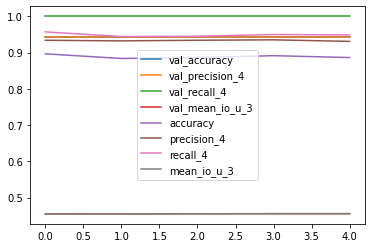

In [52]:
import matplotlib.pyplot as plt

epochs = range(epoch)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for metric in history.history:
    if "loss" not in metric:
        ax.plot(epochs, history.history[metric],label=metric)
        ax.legend()
plt.show()